In [6]:
import pandas as pd
import numpy as np
import os
import sys

import stellargraph as sg
from stellargraph.mapper import PaddedGraphGenerator
from stellargraph.layer import DeepGraphCNN
from stellargraph import StellarGraph
from stellargraph import StellarDiGraph

from stellargraph import datasets

from sklearn import model_selection
from IPython.display import display, HTML

from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Conv1D, MaxPool1D, Dropout, Flatten
from tensorflow.keras.losses import binary_crossentropy
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
matches = os.listdir("0.England/events_england/")
matches

['2499737',
 '2499897',
 '2499775',
 '2499832',
 '2500044',
 '2499756',
 '2499812',
 '2499901',
 '2499966',
 '2499755',
 '2500093',
 '2499911',
 '2499762',
 '2499920',
 '2500053',
 '2499943',
 '2499733',
 '2500076',
 '2500089',
 '2499793',
 '2499760',
 '2500039',
 '2499730',
 '2499929',
 '2499773',
 '2499731',
 '2500059',
 '2499956',
 '2500063',
 '2499993',
 '2499928',
 '2499848',
 '2499809',
 '2499992',
 '2500024',
 '2499985',
 '2499888',
 '2499766',
 '2499988',
 '2499771',
 '2499937',
 '2499934',
 '2499745',
 '2499851',
 '2500091',
 '2499932',
 '2499822',
 '2499842',
 '2500090',
 '2500072',
 '2499980',
 '2499996',
 '2500065',
 '2499813',
 '2500080',
 '2499798',
 '2499949',
 '2500088',
 '2499838',
 '2499908',
 '2499862',
 '2500030',
 '2500008',
 '2499742',
 '2499811',
 '2499990',
 '2500049',
 '2499787',
 '2499758',
 '2500036',
 '2499927',
 '2499971',
 '2499977',
 '2500015',
 '2499940',
 '2500098',
 '2499902',
 '2499826',
 '2499917',
 '2500068',
 '2499810',
 '2499804',
 '2499869',
 '24

In [8]:
graph_data_list = []
labeled_data_list = []
maTch = 0 
for match_num in matches:
# for match_num in ['2499719']:
    print("MATCH: ",match_num, maTch + 1)
    maTch += 1
    teams = os.listdir("0.England/events_england/"+str(match_num))
    for team in teams:
        shots_edges = os.listdir("0.England/events_england/"+str(match_num)+"/"+str(team)+"/shots/")
        players_df = pd.read_csv("0.England/events_england/"+str(match_num)+"/"+str(team)+"/players/players.csv")
#         print(players_df)
        for i in range(1,len(shots_edges)//2 + 1):
            shots_df = pd.read_csv("0.England/events_england/"+str(match_num)+"/"+str(team)+"/shots/shot_"+str(i)+".csv")
#             print(shots_df)
            shot_result = shots_df.Goal[0]
            passes_df = pd.read_csv("0.England/events_england/"+str(match_num)+"/"+str(team)+"/passes/pass_edge_"+str(i)+".csv")
#             print(passes_df)
            passes_df = passes_df.rename(
                columns={"Source": "source", "Target": "target", "Weight": "weight"}
            )
#             passes_edges = StellarGraph(edges = passes_df)
            name = players_df['Name'].tolist()
            field_time = players_df['Field Time'].tolist()
            position_def = players_df['Position_DEF'].tolist()
            position_fwd = players_df['Position_FWD'].tolist()
            position_gkp = players_df['Position_GKP'].tolist()
            position_mid = players_df['Position_MID'].tolist()
            foot_left = players_df['Foot_left'].tolist()
            foot_right = players_df['Foot_right'].tolist()
            player_node_data = pd.DataFrame(
                {"field_time": field_time, "position_def": position_def, "position_fwd": position_fwd, "position_gkp": position_gkp, "position_mid": position_mid, "foot_left": foot_left, "foot_right": foot_right}, index= name
            )
#             print(player_node_data)
            shot_name = shots_df['Name'].tolist()
            right = shots_df['Right'].tolist()
            left = shots_df['Left'].tolist()
            head_body = shots_df['Head/Body'].tolist()
            opportunity = shots_df['opportunity'].tolist()
            counter_attack = shots_df['counter_attack'].tolist()
            distance_to_goal = shots_df['Distance_to_goal'].tolist()
            goal = shots_df['Goal'].tolist()
            shots_node_data = pd.DataFrame(
                {"right": right, "left": left, "head_body": head_body, "opportunity": opportunity, "counter_attack": counter_attack, "distance_to_goal": distance_to_goal, "goal": goal}, index= shot_name
            )
#             print(shots_node_data)
            try:
#                 graph_data = StellarDiGraph({"shots": shots_node_data, "player": player_node_data}, passes_df, edge_type_column="type")
                graph_data = StellarDiGraph({"player": player_node_data}, passes_df)
                graph_data_list.append(graph_data)
                labeled_data_list.append(shot_result)
            except:
                print("cant convert", sys.exc_info()[0])

MATCH:  2499737 1
MATCH:  2499897 1
cant convert <class 'TypeError'>
MATCH:  2499775 1
cant convert <class 'TypeError'>
MATCH:  2499832 1
cant convert <class 'TypeError'>
MATCH:  2500044 1
cant convert <class 'TypeError'>
MATCH:  2499756 1
cant convert <class 'TypeError'>
cant convert <class 'TypeError'>
MATCH:  2499812 1
MATCH:  2499901 1
cant convert <class 'TypeError'>
cant convert <class 'TypeError'>
MATCH:  2499966 1
cant convert <class 'TypeError'>
cant convert <class 'TypeError'>
MATCH:  2499755 1
cant convert <class 'TypeError'>
cant convert <class 'TypeError'>
cant convert <class 'TypeError'>
MATCH:  2500093 1
MATCH:  2499911 1
cant convert <class 'TypeError'>
cant convert <class 'TypeError'>
MATCH:  2499762 1
MATCH:  2499920 1
MATCH:  2500053 1
MATCH:  2499943 1
cant convert <class 'TypeError'>
cant convert <class 'TypeError'>
MATCH:  2499733 1
cant convert <class 'TypeError'>
cant convert <class 'TypeError'>
cant convert <class 'TypeError'>
MATCH:  2500076 1
MATCH:  2500089 

MATCH:  2499893 1
MATCH:  2499974 1
cant convert <class 'TypeError'>
MATCH:  2499948 1
cant convert <class 'TypeError'>
cant convert <class 'TypeError'>
MATCH:  2499781 1
MATCH:  2499983 1
cant convert <class 'TypeError'>
cant convert <class 'TypeError'>
MATCH:  2500025 1
cant convert <class 'TypeError'>
cant convert <class 'TypeError'>
MATCH:  2499896 1
MATCH:  2499957 1
cant convert <class 'TypeError'>
MATCH:  2499769 1
cant convert <class 'TypeError'>
MATCH:  2499830 1
MATCH:  2499795 1
cant convert <class 'TypeError'>
cant convert <class 'TypeError'>
MATCH:  2500034 1
MATCH:  2500067 1
cant convert <class 'TypeError'>
MATCH:  2499819 1
cant convert <class 'TypeError'>
cant convert <class 'TypeError'>
MATCH:  2499936 1
MATCH:  2499732 1
cant convert <class 'TypeError'>
MATCH:  2500079 1
cant convert <class 'TypeError'>
MATCH:  2499939 1
MATCH:  2500013 1
MATCH:  2499789 1
cant convert <class 'TypeError'>
MATCH:  2500047 1
MATCH:  2499740 1
MATCH:  2500062 1
cant convert <class 'Type

cant convert <class 'TypeError'>
MATCH:  2500016 1
MATCH:  2499935 1
MATCH:  2499779 1
cant convert <class 'TypeError'>
cant convert <class 'TypeError'>
cant convert <class 'TypeError'>
MATCH:  2499955 1
MATCH:  2499931 1
MATCH:  2499860 1
cant convert <class 'TypeError'>
cant convert <class 'TypeError'>
cant convert <class 'TypeError'>
MATCH:  2499792 1
cant convert <class 'TypeError'>
MATCH:  2499784 1
MATCH:  2499984 1
cant convert <class 'TypeError'>
cant convert <class 'TypeError'>
MATCH:  2500018 1
cant convert <class 'TypeError'>
MATCH:  2499853 1
cant convert <class 'TypeError'>
MATCH:  2499874 1
MATCH:  2499805 1
MATCH:  2499721 1
MATCH:  2500035 1
cant convert <class 'TypeError'>
MATCH:  2499968 1
cant convert <class 'TypeError'>
cant convert <class 'TypeError'>
MATCH:  2500074 1
MATCH:  2500045 1
MATCH:  2499734 1
MATCH:  2499746 1
cant convert <class 'TypeError'>
cant convert <class 'TypeError'>
cant convert <class 'TypeError'>
cant convert <class 'TypeError'>
MATCH:  24998

In [9]:
summary = pd.DataFrame(
    [(g.number_of_nodes(), g.number_of_edges()) for g in graph_data_list],
    columns=["nodes", "edges"],
)
summary.describe().round(1)

,nodes,edges
count,8103.0,8103.0
mean,13.7,33.5
std,0.5,23.9
min,11.0,1.0
25%,14.0,14.0
50%,14.0,29.0
75%,14.0,50.0
max,14.0,135.0


In [10]:
graph_labels = pd.DataFrame(
    {"label": labeled_data_list}
)
graph_labels.label.value_counts().to_frame()

,label
0,7268
1,835


In [11]:
graph_labels = pd.get_dummies(graph_labels, drop_first=True)
generator = PaddedGraphGenerator(graphs=graph_data_list)

In [12]:
k = 35  # the number of rows for the output tensor
layer_sizes = [32, 32, 32, 1]

dgcnn_model = DeepGraphCNN(
    layer_sizes=layer_sizes,
    activations=["tanh", "tanh", "tanh", "tanh"],
    k=k,
    bias=False,
    generator=generator,
)
x_inp, x_out = dgcnn_model.in_out_tensors()

Instructions for updating:
Use fn_output_signature instead


In [13]:
x_out = Conv1D(filters=16, kernel_size=sum(layer_sizes), strides=sum(layer_sizes))(x_out)
x_out = MaxPool1D(pool_size=2)(x_out)

x_out = Conv1D(filters=32, kernel_size=5, strides=1)(x_out)

x_out = Flatten()(x_out)

x_out = Dense(units=128, activation="relu")(x_out)
x_out = Dropout(rate=0.5)(x_out)

predictions = Dense(units=1, activation="sigmoid")(x_out)

In [14]:
model = Model(inputs=x_inp, outputs=predictions)

model.compile(
    optimizer=Adam(lr=0.0001), loss=binary_crossentropy, metrics=["acc"],
)

/home/pratik/anaconda3/lib/python3.7/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [15]:
train_graphs, test_graphs = model_selection.train_test_split(
    graph_labels, train_size=0.9, test_size=None, stratify=graph_labels,
)

In [16]:
gen = PaddedGraphGenerator(graphs=graph_data_list)

train_gen = gen.flow(
    list(train_graphs.index - 1),
    targets=train_graphs.values,
    batch_size=50,
    symmetric_normalization=False,
)

test_gen = gen.flow(
    list(test_graphs.index - 1),
    targets=test_graphs.values,
    batch_size=1,
    symmetric_normalization=False,
)

In [17]:
epochs = 100
history = model.fit(
    train_gen, epochs=epochs, verbose=1, validation_data=test_gen, shuffle=True,
)

Epoch 1/100


/home/pratik/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/model/sort_pooling/map/while/gradients/model/sort_pooling/map/while/GatherV2_grad/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/model/sort_pooling/map/while/gradients/model/sort_pooling/map/while/GatherV2_grad/Reshape:0", shape=(None, None), dtype=float32), dense_shape=Tensor("gradient_tape/model/sort_pooling/map/while/gradients/model/sort_pooling/map/while/GatherV2_grad/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)


146/146 [==============================] - 6s 25ms/step - loss: 0.3962 - acc: 0.8774 - val_loss: 0.3338 - val_acc: 0.8964
Epoch 2/100
146/146 [==============================] - 3s 22ms/step - loss: 0.3397 - acc: 0.8970 - val_loss: 0.3350 - val_acc: 0.8964
Epoch 3/100
146/146 [==============================] - 3s 23ms/step - loss: 0.3406 - acc: 0.8970 - val_loss: 0.3335 - val_acc: 0.8964
Epoch 4/100
146/146 [==============================] - 3s 23ms/step - loss: 0.3383 - acc: 0.8970 - val_loss: 0.3334 - val_acc: 0.8964
Epoch 5/100
146/146 [==============================] - 3s 24ms/step - loss: 0.3372 - acc: 0.8970 - val_loss: 0.3329 - val_acc: 0.8964
Epoch 6/100
146/146 [==============================] - 3s 23ms/step - loss: 0.3341 - acc: 0.8970 - val_loss: 0.3331 - val_acc: 0.8964
Epoch 7/100
146/146 [==============================] - 4s 25ms/step - loss: 0.3355 - acc: 0.8970 - val_loss: 0.3327 - val_acc: 0.8964
Epoch 8/100
146/146 [==============================] - 3s 22ms/step - loss

Epoch 62/100
146/146 [==============================] - 3s 22ms/step - loss: 0.3283 - acc: 0.8970 - val_loss: 0.3282 - val_acc: 0.8964
Epoch 63/100
146/146 [==============================] - 3s 24ms/step - loss: 0.3325 - acc: 0.8970 - val_loss: 0.3278 - val_acc: 0.8964
Epoch 64/100
146/146 [==============================] - 3s 23ms/step - loss: 0.3299 - acc: 0.8970 - val_loss: 0.3280 - val_acc: 0.8964
Epoch 65/100
146/146 [==============================] - 3s 24ms/step - loss: 0.3297 - acc: 0.8970 - val_loss: 0.3278 - val_acc: 0.8964
Epoch 66/100
146/146 [==============================] - 4s 25ms/step - loss: 0.3292 - acc: 0.8970 - val_loss: 0.3277 - val_acc: 0.8964
Epoch 67/100
146/146 [==============================] - 3s 23ms/step - loss: 0.3288 - acc: 0.8970 - val_loss: 0.3280 - val_acc: 0.8964
Epoch 68/100
146/146 [==============================] - 3s 24ms/step - loss: 0.3292 - acc: 0.8970 - val_loss: 0.3283 - val_acc: 0.8964
Epoch 69/100
146/146 [==============================] -

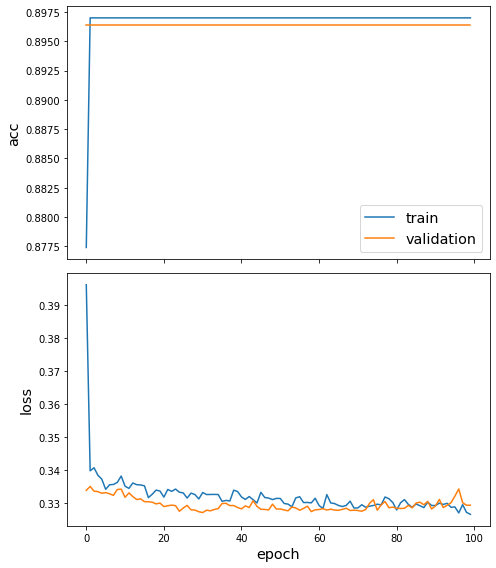

In [18]:
sg.utils.plot_history(history)


In [19]:
test_metrics = model.evaluate(test_gen)
print("\nTest Set Metrics:")
for name, val in zip(model.metrics_names, test_metrics):
    print("\t{}: {:0.4f}".format(name, val))

811/811 [==============================] - 2s 2ms/step - loss: 0.3293 - acc: 0.8964

Test Set Metrics:
	loss: 0.3293
	acc: 0.8964
